In [149]:
import numpy as np

In [150]:
def create_matrix(grid):  
    matrix = []
    C = np.zeros(len(grid)-1)
    A = np.zeros(len(grid)-1)
    B = np.zeros(len(grid))
    h = grid[1] - grid[0]
    for i in range(len(grid)):
     
        if i == 0:
            B[i] = 1  
        elif i == len(grid)-1:
            
            B[i] = 1
        else:
            A[i-1] = 1
            B[i] = -2 - (grid[i] * h) ** 2
            C[i-1] = 1

    matrix = np.diag(A, k=-1) + np.diag(B, k=0) + np.diag(C, k=1)
    return matrix

In [151]:
def create_matrix(grid):
    n = len(grid)
    h = grid[1] - grid[0]
    # diagonals = [np.ones(n-1)*0.5, (-1 - 0.5*((grid)**2))*np.ones(n), 0.5*np.ones(n-1)] ## задание элементов диагоналей матрицы
    diagonals = [np.ones(n-1) * -0.5 / h**2,-0.5/h**2 * -2 + grid**2 * 0.5, np.ones(n-1) * -0.5 / h**2]
    matrix = np.diag(diagonals[0], k=-1) + np.diag(diagonals[1], k=0) + np.diag(diagonals[2], k=1)
    matrix[0,0] = 1
    matrix[0,1] = 0
    matrix[n-1,n-1] = 1
    matrix[n-1,n-2] = 0
    return matrix

In [152]:
grid = np.linspace(-10, 10, 1000)
matrix  = np.linalg.inv(create_matrix(grid))


In [ ]:
def tridiagonal_matrix_algoritm(A, B, C, F):
    alpha = np.zeros(len(A+1))
    beta = np.zeros(len(B+1))
    
    alpha[1] = -C[0]/B[0]
    beta[1] = F[0]/B[0]
    for i in range(2, len(alpha)):
        alpha[i] = -C[i-1]/(A[i-1] * alpha[i-1] + B[i-1])
        beta[i] = (F[i - 1] - A[i - 1] * beta[i - 1])/(A[i - 1] * alpha[i - 1] + B[i - 1])
    return alpha, beta

def finding_x(alpha, beta, F, A,B,C):
    x = np.zeros_like(alpha)

    x[-1] = (F[-1] - A[-1] * beta[-1])/(B[-1] + A[-1] * alpha[-1])
    for i in range(len(alpha)-2, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + beta[i+1]
    return x

tridiagonal_matrix_algoritm()

In [147]:
import matplotlib.pyplot as plt
def find_eigen_vector(matrix):
    u0 = np.ones(len(matrix))
    u0[0] = 0
    u0[-1] = 0
    for i in range(20):
        unnormed_u1 = matrix.dot(u0)
        u1 = unnormed_u1
        # print(u1[len(matrix)//2]/u0[len(matrix)//2] - u1[len(matrix)//2+1]/u0[len(matrix)//2+1] )
        # plt.plot(grid, np.abs(u1), color = 'orange')
        # plt.plot(grid, np.abs(u0))
        # print(i)
        # plt.show()
        # plt.close()

        # if np.abs(np.abs(u1[10]/u0[10]) - np.abs(u1[100]/u0[100])) < 1e-10:
        #     print('gg')

        #     return u1, u1[len(matrix)//2]/u0[len(matrix)//2]
        print(u1[len(matrix)//2]/u0[len(matrix)//2])
        # print(u1)
        u0 = u1
    return u1, u1[len(matrix)//2]/u0[len(matrix)//2]


In [148]:
eigen_vector, eigen_value = find_eigen_vector(matrix)


2.6220297642872072
2.1216017781933663
2.026541143992059
2.0057467763747674
2.0012450967372053
2.0002961348900516
2.000100156037008
2.0000602126823064
2.000052136142629
2.0000505106717554
2.0000501844129017
2.000050119028188
2.000050105936052
2.000050103315876
2.0000501027916346
2.000050102686763
2.0000501026657846
2.000050102661589
2.0000501026607496
2.000050102660582


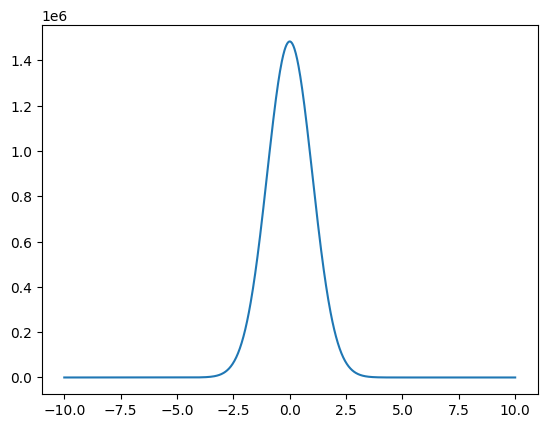

In [145]:
import matplotlib.pyplot as plt

plt.plot(grid, eigen_vector)

In [146]:
eigen_value

1.0

Найдем собственные значения

In [66]:
eig_val1, eig_vec1 = np.linalg.eig(matrix)
eig_val1.max()

1.0

In [67]:
matrix

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.3752904 , -0.3752904 ,  0.14085273, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.14085273,  0.14085273, -0.428181  , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ..., -0.428181  ,
         0.14085273,  0.14085273],
       [-0.        , -0.        , -0.        , ...,  0.14085273,
        -0.3752904 , -0.3752904 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

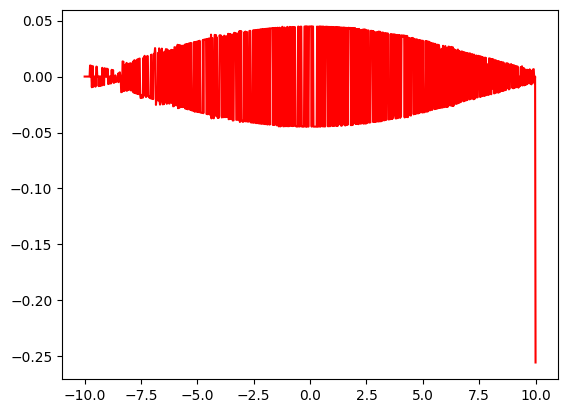

In [68]:
# plt.plot(grid, eigen_vector)
plt.plot(grid, eig_vec1[998], color = 'red')